In [1]:
#KHAI BAO TV
import numpy as np
import pandas as pd
import cv2
from keras.models import Sequential
from tensorflow.keras import datasets, layers,models
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense, Activation, Dropout,Flatten
from keras.datasets import cifar10
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from keras.utils import np_utils
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) =cifar10.load_data()
x_pre = x_test
y_ktr = y_test
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
x_train /= 255
x_test /= 255
y_train = np_utils.to_categorical(y_train, 100)
y_test = np_utils.to_categorical(y_test, 100)

In [4]:
model = Sequential()
model.add(Dense(512, activation='relu',input_shape = (x_train.shape[1],)))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(100,activation='softmax'))
model.summary()
model.compile(loss='mean_squared_error',
optimizer =Adam(), metrics=['acc'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               2

In [7]:
history = model.fit(x_train, y_train, batch_size =256, epochs = 1000, validation_split = 0.1)

176/176 [==============================] - 2s 10ms/step - loss: 0.0029 - acc: 0.7978 - val_loss: 0.0072 - val_acc: 0.5038
Epoch 938/1000
176/176 [==============================] - 2s 10ms/step - loss: 0.0029 - acc: 0.8034 - val_loss: 0.0073 - val_acc: 0.5036
Epoch 939/1000
176/176 [==============================] - 2s 10ms/step - loss: 0.0029 - acc: 0.8008 - val_loss: 0.0072 - val_acc: 0.5108
Epoch 940/1000
176/176 [==============================] - 2s 10ms/step - loss: 0.0029 - acc: 0.7988 - val_loss: 0.0074 - val_acc: 0.5000
Epoch 941/1000
176/176 [==============================] - 2s 10ms/step - loss: 0.0030 - acc: 0.7954 - val_loss: 0.0073 - val_acc: 0.5018
Epoch 942/1000
176/176 [==============================] - 2s 10ms/step - loss: 0.0029 - acc: 0.7998 - val_loss: 0.0073 - val_acc: 0.5068
Epoch 943/1000
176/176 [==============================] - 2s 9ms/step - loss: 0.0029 - acc: 0.8013 - val_loss: 0.0073 - val_acc: 0.5056
Epoch 944/1000
176/176 [==============================] -

In [8]:
model.save('CIFAR10.h5')

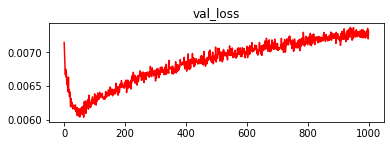

In [9]:
#VẼ ĐỒ THỊ VAL-LOSS
plt.subplot(211)
plt.title('val_loss')
plt.plot(history.history['val_loss'], color='Red',
label='train')

Nhập phần tử cần kiểm tra: 89
Đoán là:Truck


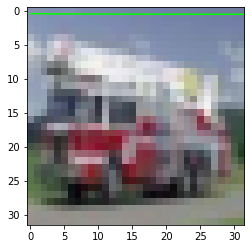

In [46]:
#VẼ ĐỒ THỊ VAL-ACC
plt.subplot(1,1,1)
#plt.title('Val Accuracy')
plt.plot(history.history['val_acc'], color='Lime',
label='train')
Label = ['Airplane', 'Automobile', 'Bird', 'Cat',
'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

test = int(input('Nhập phần tử cần kiểm tra: '))
print('Đoán là:'+ str(Label[np.argmax(model.predict(x_pre[test].reshape(-1,3072)))]))
plt.imshow(x_pre[test])